# How to properly do cross-validation on TimeSeries

From https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

In [20]:
# Load sunspot data
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('monthly-sunspots.csv', header=0)
series['Month'] = pd.to_datetime(series['Month'], format='%Y-%m')
print(series.head())

       Month  Sunspots
0 1749-01-01      58.0
1 1749-02-01      62.6
2 1749-03-01      70.0
3 1749-04-01      55.7
4 1749-05-01      85.0


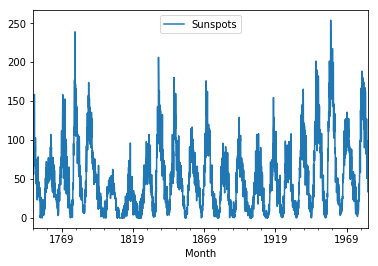

In [26]:
series.set_index('Month').plot();

# Train-Test Split

In [32]:
X = series.values
train_size = int(len(X) * 0.6)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2820
Training Observations: 1692
Testing Observations: 1128


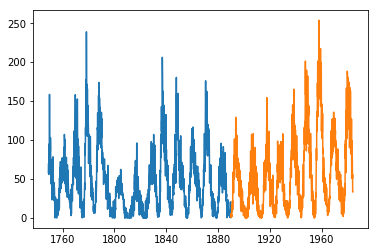

In [40]:
plt.plot(train[:,0], train[:,1]);
plt.plot(test[:,0], test[:,1]);

# Multiple Train-Test Splits (TimeSeriesSplit)

Observations: 1410
Training Observations: 705
Testing Observations: 705
Observations: 2115
Training Observations: 1410
Testing Observations: 705
Observations: 2820
Training Observations: 2115
Testing Observations: 705


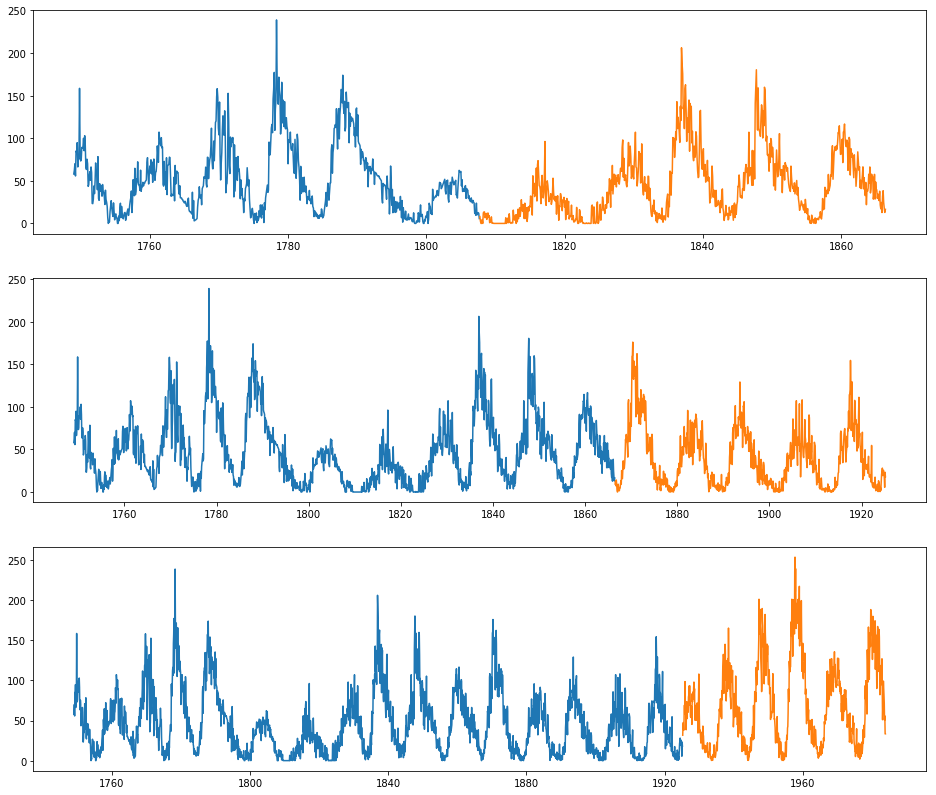

In [51]:
# using arrays
from sklearn.model_selection import TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=3)

plt.figure(figsize=(16,14))
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(310 + index)
    plt.plot(train[:,0], train[:,1])
    plt.plot(test[:,0], test[:,1])
    index += 1

Observations: 1410
Training Observations: 705
Testing Observations: 705
Observations: 2115
Training Observations: 1410
Testing Observations: 705
Observations: 2820
Training Observations: 2115
Testing Observations: 705


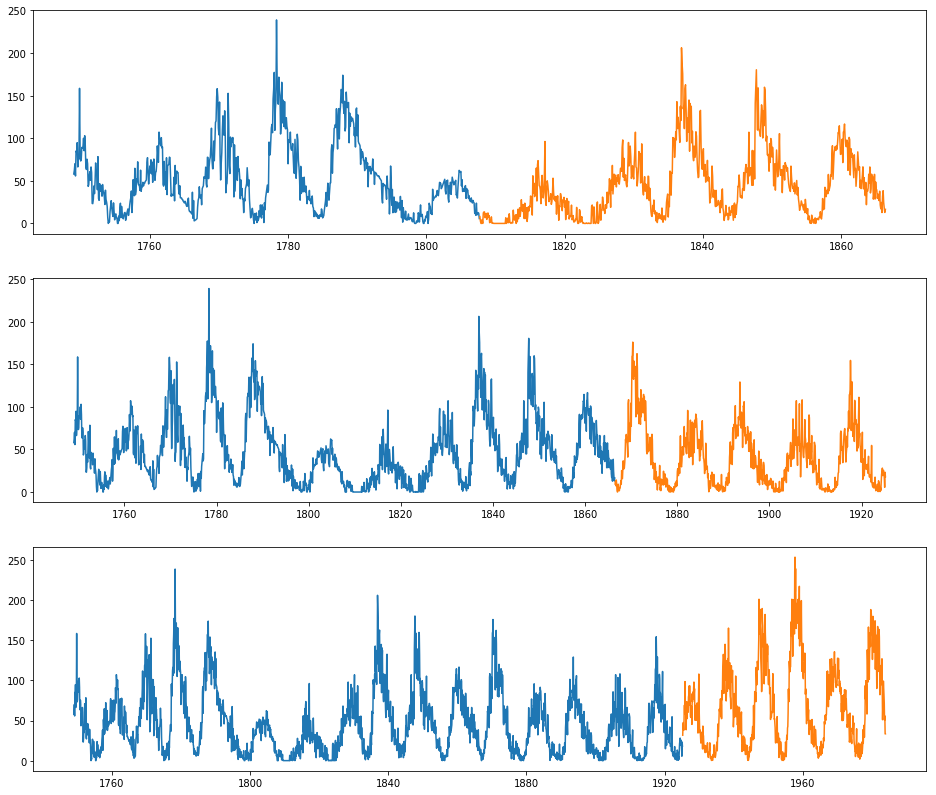

In [67]:
# using dataframes
from sklearn.model_selection import TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=3)

plt.figure(figsize=(16,14))
index = 1
for train_index, test_index in splits.split(series):
    train = series.loc[train_index]
    test = series.loc[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(310 + index)
    plt.plot(train['Month'], train['Sunspots'])
    plt.plot(test['Month'], test['Sunspots'])
    index += 1